In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# 逻辑回归

## 下载数据集

- MNIST数据集是一个手写数字图像的分类数据集
- CIFAR-10数据集是一个包含10个类别的32x32彩色图像的数据集
  ```
  torchvision.datasets.CIFAR10(root='./data', train=True, download=True)
  ```

In [2]:
import torchvision

train_set = torchvision.datasets.MNIST('.\\dataset\\mnist', train=True, download=True)
test_set = torchvision.datasets.MNIST('.\\dataset\\mnist', train=False, download=True)

## Logistic回归模型

$$ \sigma(x) = \frac{1}{1+e^{-x}} $$

将实数域的输出映射到$(0,1)$区间，并作为概率值。

其他的一些常用的sigmoid函数：
- $$ f(x) = \text{erf}(\frac{\sqrt \pi}{2} x) $$
- $$ f(x) = \tanh(x) $$
- $$ f(x) = \frac{2}{\pi} \text{gd}(\frac{\pi}{2} x) $$
- $$ f(x) = \frac{x}{1+x^2} $$
- $$ f(x) = \frac{2}{\pi} \arctan{\frac{\pi}{2} x} $$
- $$ f(x) = \frac{x}{1+|x|} $$

## 修改 Loss 函数

- 二元分类函数的交叉熵
  - $$ loss = -(y \log \hat y + (1 - y) \log (1 - \hat y)) $$

### 补充知识

- KL散度
- 交叉熵函数 - cross-entropy loss
  - 交叉熵函数是用来衡量两个概率分布之间的差异的
  - 交叉熵函数的定义为：
  - $$ H(p,q) = -\sum_{i=1}^{n} p_i \log q_i $$
  - 其中，$p_i$是真实分布$p$中第$i$个元素的概率，$q_i$是模型预测的分布$q$中第$i$个元素的概率。
  - 交叉熵函数的值越小，表示两个概率分布越接近。
  - 交叉熵函数常用于衡量两个概率分布之间的差异，通常用于训练神经网络模型。

In [3]:
# Step.1 Prepare dataset
x_data = [[1.0], [2.0], [3.0], [4.0]]
y_data = [[0], [0], [1], [1]]                   # Switch to probility distribution
x_data = torch.Tensor(x_data)
y_data = torch.Tensor(y_data)

# Step.2 Design model using Class
class LogisticRegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(1, 1)     # (1, 1) is the size of input and output
    
    def forward(self, x):
        y_pred = torch.nn.functional.sigmoid(self.linear(x))    # Use sigmoid function
        return y_pred
    
model = LogisticRegressionModel()

# Step.3 Construct loss and optimizer
criterion = torch.nn.BCELoss(reduction='sum')                   # Use BCE Loss `CE` stands for `Cross Entropy`
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Step.4 Training cycle
for epoch in range(10000):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    print(f'Epoch: {epoch}, Loss: {loss.item()}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print('w:', model.linear.weight.item())
print('b:', model.linear.bias.item())

x_test = torch.Tensor([[3.0]])
y_test = model(x_test)
print('y_pred:', y_test.item())

Epoch: 0, Loss: 3.4911534786224365
Epoch: 1, Loss: 3.431483268737793
Epoch: 2, Loss: 3.3748350143432617
Epoch: 3, Loss: 3.321202278137207
Epoch: 4, Loss: 3.2705633640289307
Epoch: 5, Loss: 3.2228798866271973
Epoch: 6, Loss: 3.178098440170288
Epoch: 7, Loss: 3.136151075363159
Epoch: 8, Loss: 3.096956491470337
Epoch: 9, Loss: 3.060420274734497
Epoch: 10, Loss: 3.0264384746551514
Epoch: 11, Loss: 2.9948956966400146
Epoch: 12, Loss: 2.965670108795166
Epoch: 13, Loss: 2.9386348724365234
Epoch: 14, Loss: 2.913658857345581
Epoch: 15, Loss: 2.8906099796295166
Epoch: 16, Loss: 2.869354009628296
Epoch: 17, Loss: 2.849759578704834
Epoch: 18, Loss: 2.8316988945007324
Epoch: 19, Loss: 2.815046548843384
Epoch: 20, Loss: 2.799682140350342
Epoch: 21, Loss: 2.785492181777954
Epoch: 22, Loss: 2.7723684310913086
Epoch: 23, Loss: 2.7602102756500244
Epoch: 24, Loss: 2.748922348022461
Epoch: 25, Loss: 2.7384190559387207
Epoch: 26, Loss: 2.7286183834075928
Epoch: 27, Loss: 2.7194466590881348
Epoch: 28, Loss:

## Visualize the result

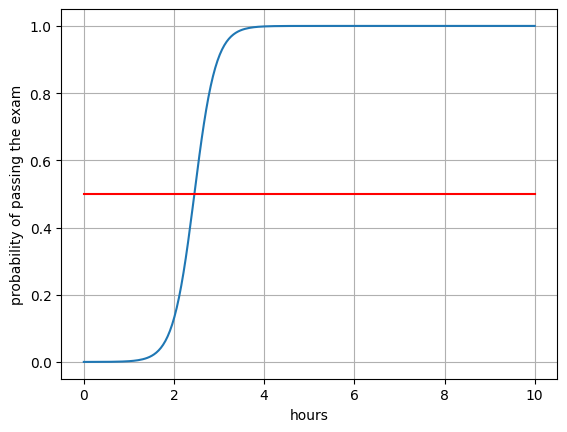

In [4]:
x = np.linspace(0, 10, 200)
x_t = torch.Tensor(x).view((200, 1))
y_t = model(x_t)
y = y_t.data.numpy()

plt.plot(x, y)
plt.plot([0, 10], [0.5, 0.5], 'r')
plt.xlabel('hours')
plt.ylabel('probability of passing the exam')
plt.grid()